Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve,f1_score,auc
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split
from time import time
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import tensorflow 
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import re
import gensim

Import Dataset

In [2]:
formspring='https://raw.githubusercontent.com/eimearfoley/CyberBullyingDetection/master/data/formspring.csv'

In [3]:
df=pd.read_csv(formspring)

Analyze Dataset

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12896 non-null  object
 1   post       12852 non-null  object
 2   ques       12852 non-null  object
 3   ans        12820 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.4+ MB


,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [5]:
df['post'][:10]

0    Q: what&#039;s your favorite song? :D<br>A: I ...
1                       Q: <3<br>A: </3 ? haha jk! <33
2    Q: &quot;hey angel  you duh sexy&quot;<br>A: R...
3                                       Q: (:<br>A: ;(
4    Q: ******************MEOWWW*******************...
5    Q: any makeup tips? i suck at doing my makeup ...
6    Q: Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s...
7    Q: Are you a morning or night person?<br>A: Ni...
8    Q: are you a trusting person?<br>A: alreadi an...
9    Q: are you a trusting person?<br>A: Yes veryy ...
Name: post, dtype: object

In [6]:
df['ques'][:10]

0               what&#039;s your favorite song? :D<br>
1                                                   <3
2                  &quot;hey angel  you duh sexy&quot;
3                                                   (:
4    ******************MEOWWW*************************
5       any makeup tips? i suck at doing my makeup lol
6    Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...
7                   Are you a morning or night person?
8                           are you a trusting person?
9                           are you a trusting person?
Name: ques, dtype: object

In [7]:
df['ans'][:10]

0             I like too many songs to have a favorite
1                                   </3 ? haha jk! <33
2                             Really?!?! Thanks?! haha
3                                                   ;(
4                                              *RAWR*?
5     Sure! Like tell me wht u wnna know?! Like wht...
6     EMMA hahahahah :D I MISSSSSeddd YUHHHHh 22222...
7                                      Night 4shuree!!
8                                       alreadi answrd
9         Yes veryy trustin person!!! May i help yuh:!
Name: ans, dtype: object

In [8]:
df['bully1'][100:110]

100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107    NaN
108    NaN
109    NaN
Name: bully1, dtype: object

In [9]:
df['bully1'].value_counts()

None                                                                                                                      593
Na                                                                                                                         89
N/A.                                                                                                                       74
no                                                                                                                         47
N/a                                                                                                                        47
                                                                                                                         ... 
so be a bitch to Someone who cares pussy ass fuken ugly bitchez fukk youu!!!!!                                              1
you have big feet                                                                                                     

In [10]:
print(df['ans1'].value_counts())
print(df['ans2'].value_counts())
print(df['ans3'].value_counts())

No     11693
Yes     1038
0         12
5          5
3          5
1          2
7          1
6          1
2          1
4          1
Name: ans1, dtype: int64
No     11696
Yes     1005
Name: ans2, dtype: int64
No     11711
Yes      944
Name: ans3, dtype: int64


In [11]:
df = df[df['post'].notna()]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12852 entries, 0 to 12900
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     12852 non-null  object
 1   post       12852 non-null  object
 2   ques       12850 non-null  object
 3   ans        12819 non-null  object
 4   asker      12801 non-null  object
 5   ans1       12759 non-null  object
 6   severity1  12788 non-null  object
 7   bully1     1909 non-null   object
 8   ans2       12701 non-null  object
 9   severity2  12739 non-null  object
 10  bully2     1786 non-null   object
 11  ans3       12655 non-null  object
 12  severity3  12698 non-null  object
 13  bully3     1780 non-null   object
dtypes: object(14)
memory usage: 1.5+ MB


In [13]:
ans=np.array(df['ans'])
ques=np.array(df['ques'])
posts=[]
for i in range (0,len(ans)):
  posts.append(str(ques[i])+str(ans[i]))

In [14]:
print(ques[0])
print(ans[0])
print(posts[0])

what&#039;s your favorite song? :D<br>
 I like too many songs to have a favorite
what&#039;s your favorite song? :D<br> I like too many songs to have a favorite


In [15]:
y1=np.array(df['ans1'])
y2=np.array(df['ans2'])
y3=np.array(df['ans3'])

In [16]:
X=[]
y=[]
for i in range (len(posts)):
  X.append(posts[i])
  if y1[i]=='Yes' :
    y.append(1)
  else:
    y.append(0)

Data Preprocessing

In [17]:
X=np.array(X)
X=np.reshape(X,(-1,1))
y=np.array(y)


In [18]:
X.shape,y.shape

((12852, 1), (12852,))

In [19]:
print(Counter(y))

Counter({0: 11814, 1: 1038})


In [20]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler( sampling_strategy=0.3)
X,y=oversample.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
X.shape,y.shape

((15358, 1), (15358,))

In [22]:
print(Counter(y))

Counter({0: 11814, 1: 3544})


In [23]:
X[:6],y[:6]

(array([['what&#039;s your favorite song? :D<br> I like too many songs to have a favorite'],
        ['<3 </3 ? haha jk! <33'],
        ['&quot;hey angel  you duh sexy&quot; Really?!?! Thanks?! haha'],
        ['(: ;('],
        ['******************MEOWWW************************* *RAWR*?'],
        ['any makeup tips? i suck at doing my makeup lol Sure! Like tell me wht u wnna know?! Like wht do you use?!']],
       dtype='<U5541'), array([0, 0, 0, 0, 0, 0]))

In [24]:
type(X)

numpy.ndarray

In [25]:
X=[str(x) for x in X]

In [26]:
type(X)

list

Create Word Embeddings

In [28]:
stopwords=stopwords.words('english')

In [29]:
contractions =dict({ 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": " he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": " he would",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that has",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they had",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who has",
"who’ve": "who have",
"why’s": "why has",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have"
})

In [30]:
contractions["it’s"]

'it is'

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 8273, 1: 2477})
Counter({0: 3541, 1: 1067})


In [33]:
def cleanText(X):
  corpus=[]
  for para in X:
      sentences=nltk.sent_tokenize(str(para))
      temp=[]
      for sentence in sentences:
          sentence=sentence.lower()
          cleanr = re.compile('<.*?>')
          sentence = re.sub(cleanr, '', sentence)
          sentence=re.sub(r'[\!"#$%&\*+,./;<=>?@_`|~=]','',sentence)
          sentence=re.sub(r'[0-9]+', '',sentence)
          words=sentence.split()
          words_list=[]
          for word in words:
            if word in contractions:
              words_list.append(contractions[word])
            elif word not in stopwords:
              words_list.append(WordNetLemmatizer().lemmatize(word) )
          sent=' '.join(words_list)
          sent=re.sub(pattern=r'\'',repl='',string=sent)
          temp.append(sent)
      corpus.append('. '.join(temp))
  return corpus

In [34]:
corpus=cleanText(X_train)
lst_corpus = []
for string in corpus:
   lst_words = string.split()
   lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
   lst_corpus.append(lst_grams)


In [35]:
print(len(corpus))
print(len(lst_corpus))

10750
10750


In [36]:
corpus[:6]

['[awhh shit dx man. (: taelin walker webb ]',
 '[if could watch one tv show would. office ]',
 '[no. hate taylor used b firey dyed hair okay dont really give shit find something better criticize me]',
 '[its prolly think wanted know thought :) welll]',
 '[holar :) wasup]',
 '[lol :] anonymous]']

In [37]:
lst_corpus[:6]

[['[awhh', 'shit', 'dx', 'man.', '(:', 'taelin', 'walker', 'webb', ']'],
 ['[if', 'could', 'watch', 'one', 'tv', 'show', 'would.', 'office', ']'],
 ['[no.',
  'hate',
  'taylor',
  'used',
  'b',
  'firey',
  'dyed',
  'hair',
  'okay',
  'dont',
  'really',
  'give',
  'shit',
  'find',
  'something',
  'better',
  'criticize',
  'me]'],
 ['[its', 'prolly', 'think', 'wanted', 'know', 'thought', ':)', 'welll]'],
 ['[holar', ':)', 'wasup]'],
 ['[lol', ':]', 'anonymous]']]

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lst_corpus)
dic_vocabulary = tokenizer.word_index

In [39]:
X_train= tokenizer.texts_to_sequences(lst_corpus)

In [40]:
arr=[]
arr=[len(x) for x in corpus if len(x)<500]

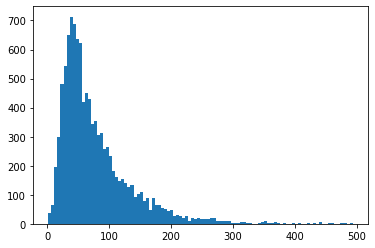

In [41]:
plt.hist(arr,bins=100)
plt.show()

In [42]:
max_length=100
X_train=pad_sequences(X_train,maxlen=max_length,padding='post')

In [43]:
X_train.shape,y_train.shape

((10750, 100), (10750,))

In [44]:
corpus=cleanText(X_test)

lst_corpus_test = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, 
                 len(lst_words), 1)]
    lst_corpus_test.append(lst_grams)

X_test = tokenizer.texts_to_sequences(lst_corpus_test)

X_test=pad_sequences(X_test,maxlen=max_length,padding='post')

In [45]:
print(len(corpus))
print(len(lst_corpus))

4608
10750


In [46]:
X_test.shape,y_test.shape

((4608, 100), (4608,))

In [47]:
def pipeline(X_train, y_train, X_test, y_test,n,flag): 
   
    results = {}
    final_results = []
    for num in n:  

      wv_model = gensim.models.word2vec.Word2Vec(lst_corpus,size=num,window=4,min_count=1,sg=flag,iter=30)

      embedding_dim = num
      embedding_matrix = np.zeros((len(dic_vocabulary)+1, embedding_dim))
      for word, i in tokenizer.word_index.items():
        try:
            embedding_matrix[i]=wv_model[word]
        except:
            pass

      tensorflow.keras.backend.clear_session()

      #LSTM
      model=Sequential()

      model.add(layers.Embedding(input_dim=embedding_matrix.shape[0],output_dim=embedding_matrix.shape[1],weights=[embedding_matrix],input_length=max_length,trainable=False)) 

      model.add(layers.LSTM(100,return_sequences=True,dropout=0.2))

      model.add(layers.GlobalMaxPooling1D())

      model.add(layers.Dense(128,activation='relu')) 
      model.add(layers.Dense(1,activation='sigmoid')) 

      model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

      start=time()
      model.fit(X_train,y_train,epochs=10)
      end=time()
      
        
      results['Algorithm'] = 'embedding'+str(num)

      start = time() 
      predictions_test = model.predict(X_test)
      predictions_test=[np.round(i) for i in predictions_test]
      end = time()

      results['Prediction Time'] = end - start

      results['Accuracy'] = accuracy_score(y_test, predictions_test)

      results['F1 Score'] = f1_score(y_test, predictions_test)
      
      results['AUC Score'] = roc_auc_score(y_test, predictions_test)

      results['Precision'] = precision_score(y_test, predictions_test)

      results['Recall'] = recall_score(y_test, predictions_test)

      
      final_results.append(results.copy())
    return final_results

In [48]:
n=[50,100,150,200,250,300,350,400]

CBOW

In [49]:
re = pipeline(X_train, y_train, X_test, y_test,n,0)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score', 'Prediction Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 5s 7ms/step - loss: 0.4210 - accuracy: 0.8248
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3709 - accuracy: 0.8458
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3329 - accuracy: 0.8661
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2946 - accuracy: 0.8795
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2715 - accuracy: 0.8909
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2407 - accuracy: 0.9049
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2201 - accuracy: 0.9141
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1976 - accuracy: 0.9256
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1800 - accuracy: 0.9310
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1593 - accuracy: 0.9401

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 7ms/step - loss: 0.4234 - accuracy: 0.8236
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3735 - accuracy: 0.8488
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3338 - accuracy: 0.8633
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2861 - accuracy: 0.8851
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2474 - accuracy: 0.9048
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2120 - accuracy: 0.9168
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1820 - accuracy: 0.9294
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1568 - accuracy: 0.9407
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1341 - accuracy: 0.9524
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1153 - accuracy: 0.9559

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4220 - accuracy: 0.8263
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3657 - accuracy: 0.8509
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3131 - accuracy: 0.8753
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2624 - accuracy: 0.8970
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2227 - accuracy: 0.9134
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1844 - accuracy: 0.9298
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1555 - accuracy: 0.9431
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1285 - accuracy: 0.9540
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1083 - accuracy: 0.9580
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.0977 - accuracy: 0.9647

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4262 - accuracy: 0.8223
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3832 - accuracy: 0.8429
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3456 - accuracy: 0.8614
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3091 - accuracy: 0.8762
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2707 - accuracy: 0.8925
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2405 - accuracy: 0.9085
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2061 - accuracy: 0.9221
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1814 - accuracy: 0.9325
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1557 - accuracy: 0.9421
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1475 - accuracy: 0.9440

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4127 - accuracy: 0.8285
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3516 - accuracy: 0.8586
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2961 - accuracy: 0.8844
Epoch 4/10
336/336 [==============================] - 3s 7ms/step - loss: 0.2527 - accuracy: 0.9009
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2046 - accuracy: 0.9238
Epoch 6/10
336/336 [==============================] - 3s 7ms/step - loss: 0.1715 - accuracy: 0.9356
Epoch 7/10
336/336 [==============================] - 3s 7ms/step - loss: 0.1455 - accuracy: 0.9457
Epoch 8/10
336/336 [==============================] - 3s 7ms/step - loss: 0.1202 - accuracy: 0.9553
Epoch 9/10
336/336 [==============================] - 3s 7ms/step - loss: 0.0938 - accuracy: 0.9672
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0782 - accuracy: 0.9702

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4148 - accuracy: 0.8300
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3610 - accuracy: 0.8527
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3077 - accuracy: 0.8764
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2529 - accuracy: 0.9000
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2098 - accuracy: 0.9219
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1717 - accuracy: 0.9380
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1424 - accuracy: 0.9505
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1195 - accuracy: 0.9598
Epoch 9/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0983 - accuracy: 0.9656
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0796 - accuracy: 0.9730

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4165 - accuracy: 0.8284
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3557 - accuracy: 0.8537
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3029 - accuracy: 0.8765
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2513 - accuracy: 0.9019
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2071 - accuracy: 0.9195
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1708 - accuracy: 0.9367
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1373 - accuracy: 0.9495
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1160 - accuracy: 0.9573
Epoch 9/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0941 - accuracy: 0.9662
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0786 - accuracy: 0.9727

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 9ms/step - loss: 0.4125 - accuracy: 0.8308
Epoch 2/10
336/336 [==============================] - 3s 9ms/step - loss: 0.3487 - accuracy: 0.8583
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2907 - accuracy: 0.8843
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2408 - accuracy: 0.9097
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1959 - accuracy: 0.9273
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1590 - accuracy: 0.9435
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1320 - accuracy: 0.9527
Epoch 8/10
336/336 [==============================] - 3s 9ms/step - loss: 0.1064 - accuracy: 0.9623
Epoch 9/10
336/336 [==============================] - 3s 9ms/step - loss: 0.0957 - accuracy: 0.9669
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.9727

In [50]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding50,0.912543,0.836714,0.773196,0.803702,0.863864,0.691238
1,embedding100,0.892144,0.711111,0.899719,0.794373,0.894790,0.737169
2,embedding150,0.931424,0.838593,0.871603,0.854779,0.910526,0.742313
3,embedding200,0.907118,0.819820,0.767573,0.792836,0.858370,0.744120
4,embedding250,0.941189,0.880497,0.863168,0.871746,0.913933,0.758734
5,embedding300,0.927951,0.836847,0.855670,0.846154,0.902701,0.846453
6,embedding350,0.914497,0.776500,0.885661,0.827496,0.904423,0.883151
7,embedding400,0.869575,0.650517,0.943768,0.770172,0.895493,0.872190


In [51]:
y1=results['AUC Score']

In [52]:
results.sort_values(by = 'AUC Score', inplace = True, ascending = False)
results.reset_index(drop = True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding250,0.941189,0.880497,0.863168,0.871746,0.913933,0.758734
1,embedding150,0.931424,0.838593,0.871603,0.854779,0.910526,0.742313
2,embedding350,0.914497,0.776500,0.885661,0.827496,0.904423,0.883151
3,embedding300,0.927951,0.836847,0.855670,0.846154,0.902701,0.846453
4,embedding400,0.869575,0.650517,0.943768,0.770172,0.895493,0.872190
5,embedding100,0.892144,0.711111,0.899719,0.794373,0.894790,0.737169
6,embedding50,0.912543,0.836714,0.773196,0.803702,0.863864,0.691238
7,embedding200,0.907118,0.819820,0.767573,0.792836,0.858370,0.744120


SKIP GRAM

In [53]:
re = pipeline(X_train, y_train, X_test, y_test,n,1)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score', 'Prediction Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 7ms/step - loss: 0.4158 - accuracy: 0.8281
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3416 - accuracy: 0.8633
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2925 - accuracy: 0.8847
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2576 - accuracy: 0.9003
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2293 - accuracy: 0.9115
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2092 - accuracy: 0.9198
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1811 - accuracy: 0.9305
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1728 - accuracy: 0.9360
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1525 - accuracy: 0.9418
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1440 - accuracy: 0.9475

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4202 - accuracy: 0.8254
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3473 - accuracy: 0.8610
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2961 - accuracy: 0.8828
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2479 - accuracy: 0.9034
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2098 - accuracy: 0.9209
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1838 - accuracy: 0.9308
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1505 - accuracy: 0.9437
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1314 - accuracy: 0.9533
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1086 - accuracy: 0.9629
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1020 - accuracy: 0.9630

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4078 - accuracy: 0.8307
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3326 - accuracy: 0.8640
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2717 - accuracy: 0.8911
Epoch 4/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2251 - accuracy: 0.9161
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1855 - accuracy: 0.9308
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1484 - accuracy: 0.9445
Epoch 7/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1263 - accuracy: 0.9563
Epoch 8/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1028 - accuracy: 0.9627
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.0918 - accuracy: 0.9656
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.0794 - accuracy: 0.9714

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4089 - accuracy: 0.8346
Epoch 2/10
336/336 [==============================] - 2s 7ms/step - loss: 0.3353 - accuracy: 0.8647
Epoch 3/10
336/336 [==============================] - 2s 7ms/step - loss: 0.2714 - accuracy: 0.8905
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2159 - accuracy: 0.9155
Epoch 5/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1732 - accuracy: 0.9361
Epoch 6/10
336/336 [==============================] - 2s 7ms/step - loss: 0.1369 - accuracy: 0.9506
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1063 - accuracy: 0.9628
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0913 - accuracy: 0.9667
Epoch 9/10
336/336 [==============================] - 3s 7ms/step - loss: 0.0698 - accuracy: 0.9753
Epoch 10/10
336/336 [==============================] - 2s 7ms/step - loss: 0.0617 - accuracy: 0.9788

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4060 - accuracy: 0.8324
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3309 - accuracy: 0.8654
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2682 - accuracy: 0.8923
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2148 - accuracy: 0.9179
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1682 - accuracy: 0.9378
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1354 - accuracy: 0.9513
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1037 - accuracy: 0.9628
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0846 - accuracy: 0.9702
Epoch 9/10
336/336 [==============================] - 2s 7ms/step - loss: 0.0740 - accuracy: 0.9733
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0629 - accuracy: 0.9765

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.4006 - accuracy: 0.8357
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3272 - accuracy: 0.8673
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2663 - accuracy: 0.8943
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2023 - accuracy: 0.9224
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1681 - accuracy: 0.9390
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1263 - accuracy: 0.9534
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1033 - accuracy: 0.9634
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0815 - accuracy: 0.9708
Epoch 9/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0621 - accuracy: 0.9773
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0551 - accuracy: 0.9797

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 8ms/step - loss: 0.3999 - accuracy: 0.8343
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3227 - accuracy: 0.8703
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2570 - accuracy: 0.8999
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1989 - accuracy: 0.9249
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1505 - accuracy: 0.9470
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1118 - accuracy: 0.9613
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0881 - accuracy: 0.9702
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0717 - accuracy: 0.9743
Epoch 9/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0487 - accuracy: 0.9831
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0466 - accuracy: 0.9823

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


Epoch 1/10
336/336 [==============================] - 4s 9ms/step - loss: 0.4098 - accuracy: 0.8283
Epoch 2/10
336/336 [==============================] - 3s 8ms/step - loss: 0.3431 - accuracy: 0.8593
Epoch 3/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2923 - accuracy: 0.8812
Epoch 4/10
336/336 [==============================] - 3s 8ms/step - loss: 0.2375 - accuracy: 0.9043
Epoch 5/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1949 - accuracy: 0.9226
Epoch 6/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1584 - accuracy: 0.9398
Epoch 7/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1291 - accuracy: 0.9538
Epoch 8/10
336/336 [==============================] - 3s 8ms/step - loss: 0.1020 - accuracy: 0.9656
Epoch 9/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0846 - accuracy: 0.9707
Epoch 10/10
336/336 [==============================] - 3s 8ms/step - loss: 0.0688 - accuracy: 0.9750

In [54]:
results

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding50,0.927300,0.854651,0.826617,0.840400,0.892128,0.679365
1,embedding100,0.936415,0.926211,0.788191,0.851646,0.884635,0.756474
2,embedding150,0.947266,0.912826,0.853796,0.882324,0.914613,0.760445
3,embedding200,0.927951,0.794707,0.928772,0.856525,0.928238,0.811705
4,embedding250,0.946615,0.936238,0.825679,0.877490,0.904368,0.810684
5,embedding300,0.955946,0.932000,0.873477,0.901790,0.927137,0.782796
6,embedding350,0.953559,0.890210,0.911903,0.900926,0.939007,0.800762
7,embedding400,0.944227,0.859680,0.907216,0.882809,0.931298,0.887868


In [55]:
y2=results['AUC Score']

In [56]:
results.sort_values(by = 'AUC Score', inplace = True, ascending = False)
results.reset_index(drop = True)

,Algorithm,Accuracy,Precision,Recall,F1 Score,AUC Score,Prediction Time
0,embedding350,0.953559,0.890210,0.911903,0.900926,0.939007,0.800762
1,embedding400,0.944227,0.859680,0.907216,0.882809,0.931298,0.887868
2,embedding200,0.927951,0.794707,0.928772,0.856525,0.928238,0.811705
3,embedding300,0.955946,0.932000,0.873477,0.901790,0.927137,0.782796
4,embedding150,0.947266,0.912826,0.853796,0.882324,0.914613,0.760445
5,embedding250,0.946615,0.936238,0.825679,0.877490,0.904368,0.810684
6,embedding50,0.927300,0.854651,0.826617,0.840400,0.892128,0.679365
7,embedding100,0.936415,0.926211,0.788191,0.851646,0.884635,0.756474


GRAPH

In [57]:
y1

0    0.863864
1    0.894790
2    0.910526
3    0.858370
4    0.913933
5    0.902701
6    0.904423
7    0.895493
Name: AUC Score, dtype: float64

In [58]:
y2

0    0.892128
1    0.884635
2    0.914613
3    0.928238
4    0.904368
5    0.927137
6    0.939007
7    0.931298
Name: AUC Score, dtype: float64

In [59]:
y1=np.array(y1)
y1

array([0.86386425, 0.89479023, 0.91052597, 0.85836977, 0.9139335 ,
       0.90270091, 0.90442314, 0.89549294])

In [60]:
y2=np.array(y2)
y2

array([0.89212788, 0.88463499, 0.91461318, 0.92823815, 0.90436755,
       0.92713671, 0.9390069 , 0.93129817])

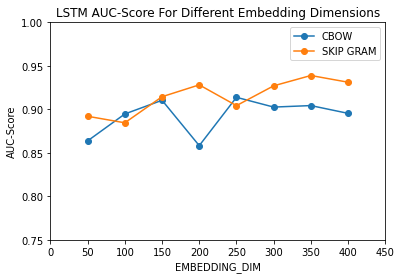

In [62]:
plt.plot(n,y1,label="CBOW",marker='o')
plt.plot(n,y2,label="SKIP GRAM",marker='o')
plt.axis([0,450,0.75,1.00])
plt.xlabel('EMBEDDING_DIM')
plt.ylabel('AUC-Score')
plt.legend()
plt.title('LSTM AUC-Score For Different Embedding Dimensions')
plt.show()
